In [1]:
# Importing modules from the libraries
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

LABELS = ['Normal', 'Fraud']

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from the csv file using pandas
df = pd.read_csv('creditcard.csv')

In [3]:
# Display all the columns and first 5 rows
pd.set_option('max_columns', None)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [4]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

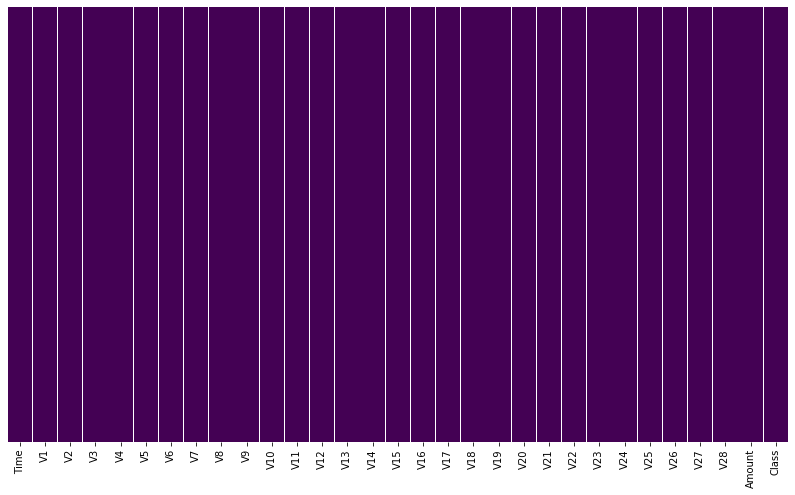

In [5]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [6]:
#There is no missing data in the dataset.

In [7]:
df.describe().transpose()

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.919560e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.688174e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.769071e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.782312e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552563e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.010663e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.694249e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.927028e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.137024e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.768627e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.170318e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.810658e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.693438e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.479045e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.482336e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392007e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.528491e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.328772e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.049732e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.085503e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.537294e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  7.959909e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.367590e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.458112e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.453003e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.699104e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660161e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.206049e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [3]:
# generate count statistics of duplicate entries
if (len(df[df.duplicated()]) > 0):
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep = False)].sort_values(by = list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  1081
     Time        V1        V2        V3        V4        V5        V6  \
34   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
32   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
112  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   

           V7        V8        V9  ...       V21       V22       V23  \
34   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
35   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
32   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
33   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
112 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   

          V24       V25       V26       V27       V28  Amount  Class  
34   0.000753  0.098117 

In [4]:
df.drop_duplicates(keep = False, inplace = True)

In [10]:
df.shape

(282953, 31)

In [11]:
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.001628358932787715
Fraud Cases: 460
Valid Cases: 282493


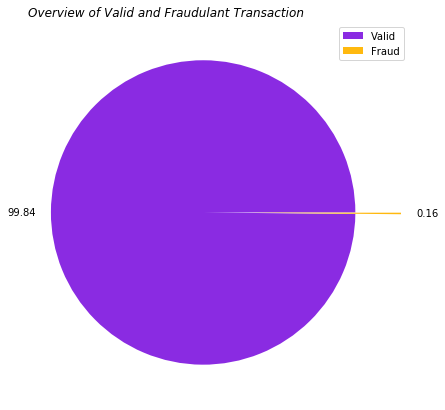

In [12]:
data_count = (df.Class.value_counts())
total = sum(data_count)
data_percentage = (data_count)/total*100
plt.figure(figsize = (7,7))
plt.pie(data_percentage,explode = (0.1, 0.2), labels = [round(i,2) for i in (list(data_percentage))],colors = ['#8A2BE2','#FFB90F'])
plt.title(label = 'Overview of Valid and Fraudulant Transaction', fontstyle='italic', loc= 'left')
plt.legend(labels = ['Valid','Fraud'])
plt.show()

In [13]:
# we need to analyze more amount of information from the transaction data
# how different are the amount of money used in different transaction classses?
print(Fraud.Amount.describe())
print()
print(Valid.Amount.describe())

count     460.000000
mean      124.045239
std       262.620752
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

count    282493.000000
mean         88.476932
std         250.543853
min           0.000000
25%           5.640000
50%          22.000000
75%          77.600000
max       25691.160000
Name: Amount, dtype: float64


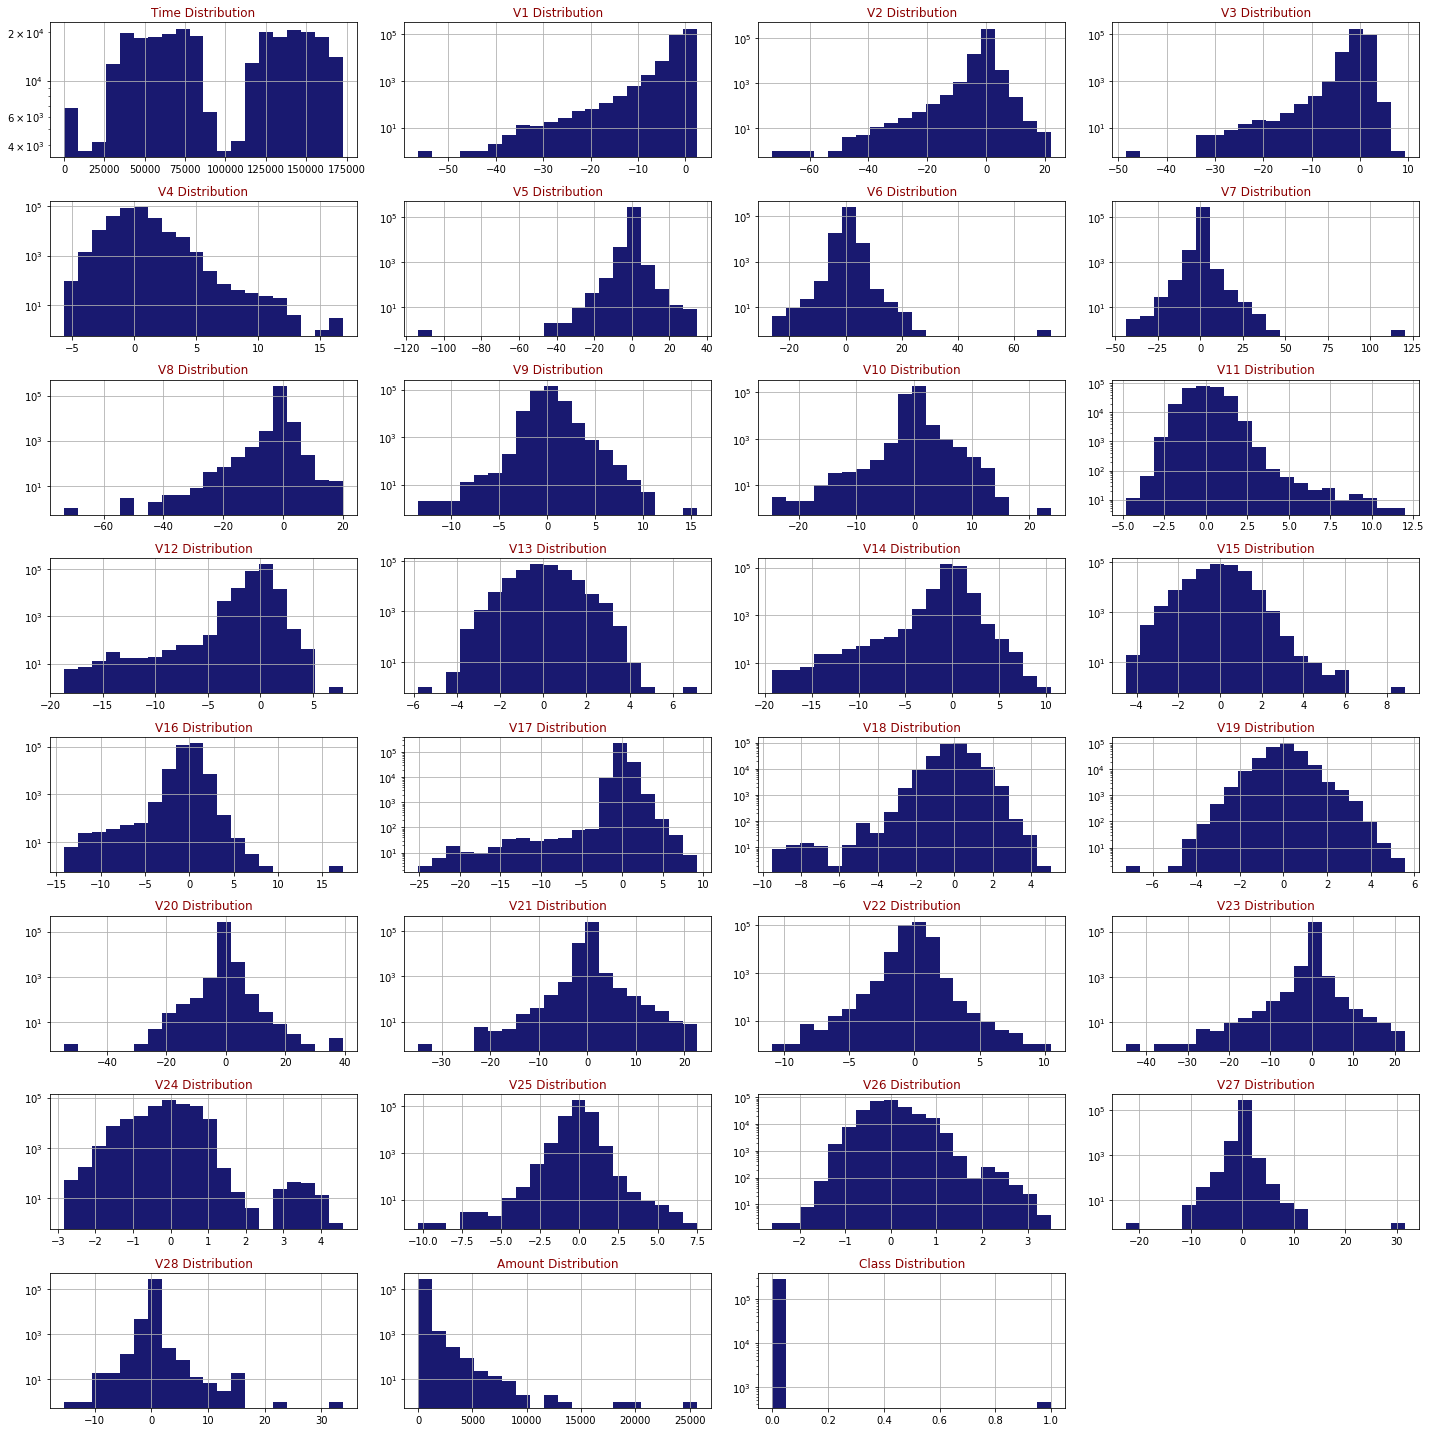

In [14]:
# Plot histogram of each parameter
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature+" Distribution", color = 'DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

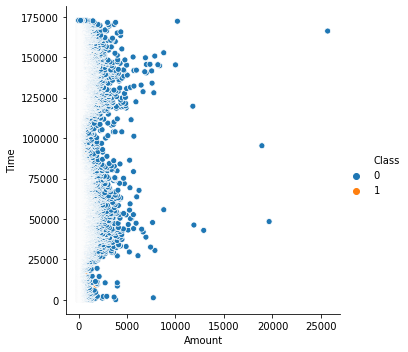

In [15]:
sns.relplot(x = 'Amount', y = 'Time', hue = 'Class', data = df);

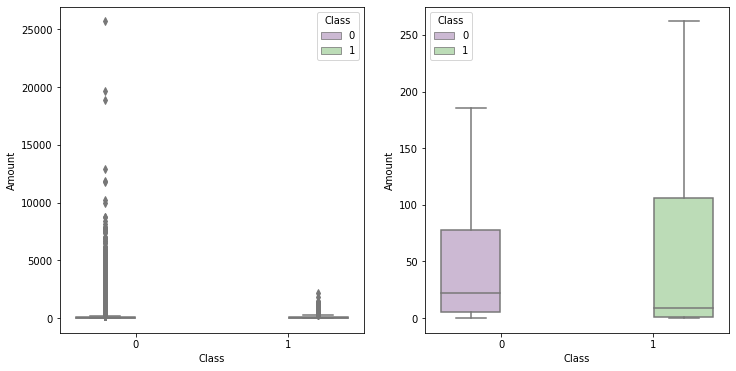

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,6))
s = sns.boxplot(ax = ax1, x = "Class", y = "Amount", hue = "Class", data = df, palette = "PRGn", showfliers = True)
s = sns.boxplot(ax = ax2, x = "Class", y = "Amount", hue = "Class", data = df, palette = "PRGn", showfliers = False)
plt.show();

In [17]:
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False, show_rug = False)
fig['layout'].update(title = 'Credit Card Transactions Time Density Plot', xaxis = dict(title = 'Time [s]'))
iplot(fig, filename = 'dist_only')

In [5]:
# Take some sample of the data

data= df.sample(frac = 0.1, random_state = 1)

data.shape

(28295, 31)

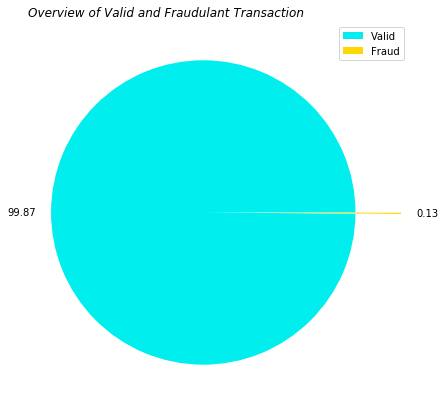

In [19]:
data_count = (data.Class.value_counts())
total = sum(data_count)
data_percentage = (data_count)/total*100
plt.figure(figsize = (7,7))
plt.pie(data_percentage,explode = (0.1, 0.2), labels = [round(i,2) for i in (list(data_percentage))],colors = ['#00EEEE','#FFD700'])
plt.title(label = 'Overview of Valid and Fraudulant Transaction', fontstyle='italic', loc= 'left')
plt.legend(labels = ['Valid','Fraud'])
plt.show()

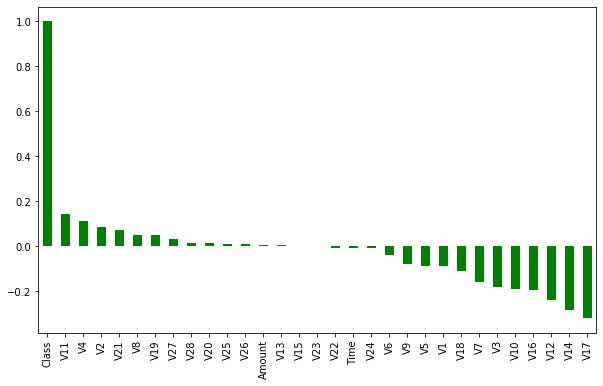

In [20]:
plt.figure(figsize = (10, 6))
data.corr()['Class'].sort_values(ascending = False).plot(kind = 'bar', color = {'green'});

In [21]:
# All high correlation features to class are 'V1', 'V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V17'.

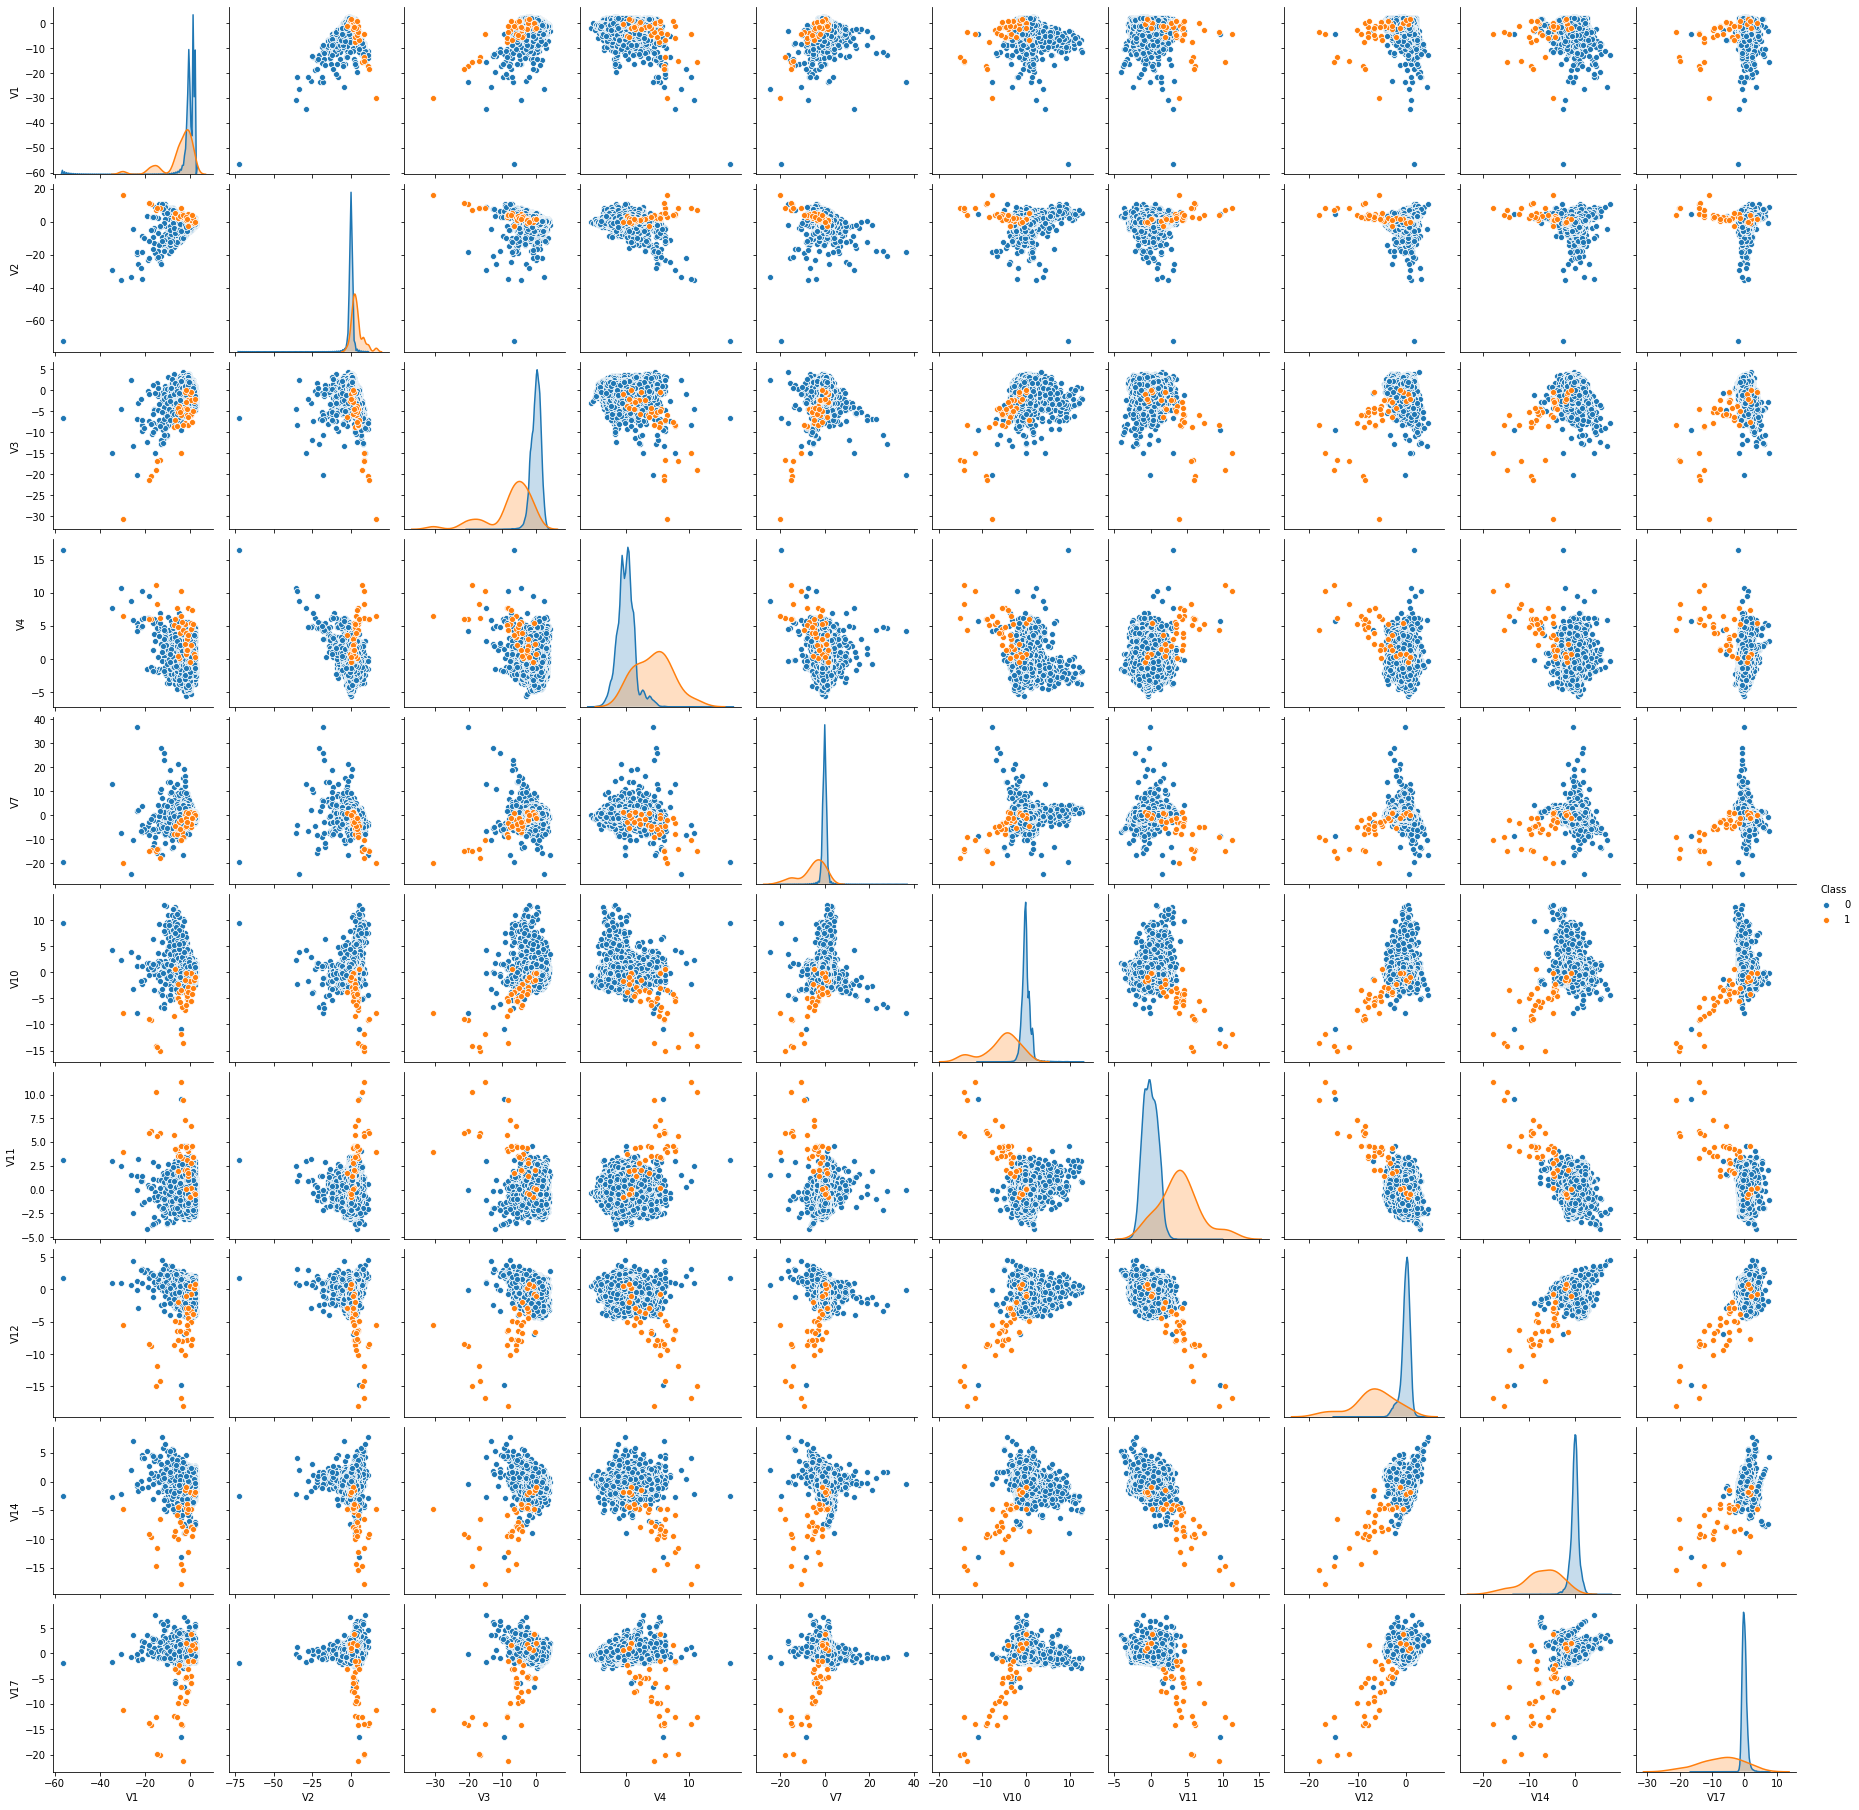

In [22]:
# pair plot will give good intuition about geomentry of data points on all features
sns.pairplot(data[['V1', 'V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V17', 'Class']], hue = 'Class');

In [6]:
#Create independent and Dependent Features
columns = data.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting 
target = "Class"

# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28295, 30)
(28295,)


In [24]:
# Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators = 100, max_samples = len(X), 
                                       contamination = outlier_fraction, random_state = state, verbose = 2),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors = 20, algorithm = 'auto', 
                                              leaf_size = 30, metric = 'minkowski',
                                              p = 2, metric_params = None, contamination = outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel = 'rbf', degree = 3, gamma = 0.1, nu = 0.05, 
                                         max_iter = -1)
   
}

In [25]:
# Fit the model
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y, y_pred))
    print("Classification Report :")
    print(classification_report(Y, y_pred))

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estimator 19 of 100 for this parallel run (total 100)...
Building estimator 20 of 100 for this parallel run (total 100)...
Building esti

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Isolation Forest: 62
Accuracy Score :
0.9978088001413677
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28258
           1       0.23      0.30      0.26        37

    accuracy                           1.00     28295
   macro avg       0.62      0.65      0.63     28295
weighted avg       1.00      1.00      1.00     28295

Local Outlier Factor: 84
Accuracy Score :
0.9970312776108853
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28258
           1       0.00      0.00      0.00        37

    accuracy                           1.00     28295
   macro avg       0.50      0.50      0.50     28295
weighted avg       1.00      1.00      1.00     28295

Support Vector Machine: 11051
Accuracy Score :
0.6094362961654003
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.61  

Observations :

1. Isolation Forest detected 62 errors versus Local Outlier Factor detecting 84 errors vs. SVM detecting 11051 errors

2. Isolation Forest has a 99.78% more accurate than LOF of 99.7% and SVM of 60.94%

3. When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 23 % versus LOF and SVM detection rate is 0%.

4. So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

5. We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases.

In [7]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

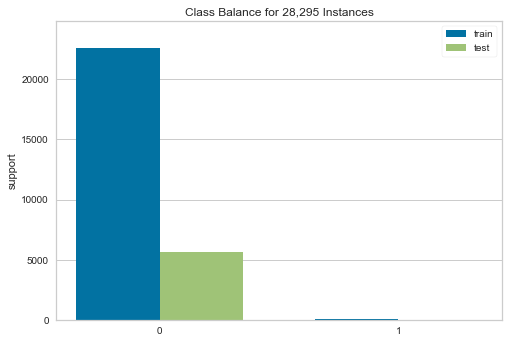

In [26]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels = [0, 1])
visualizer.fit(Y_train, Y_test)
visualizer.poof();

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [9]:
log_class = LogisticRegression()
grid = {'C':10.0 **np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits = 5, random_state = None, shuffle = False)

In [10]:
clf = GridSearchCV(log_class, grid, cv = cv, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [11]:
Y_train_pred_LogReg = clf.predict(X_train)
Y_test_pred_LogReg = clf.predict(X_test)

In [12]:
# Get the accuracy scores
train_accuracy_LogReg = accuracy_score(Y_train_pred_LogReg, Y_train)
test_accuracy_LogReg = accuracy_score(Y_test_pred_LogReg, Y_test)

print("The accuracy on train data for Logistic Regression is ", train_accuracy_LogReg)
print("The accuracy on test data for Logistic Regression is ", test_accuracy_LogReg)

The accuracy on train data for Logistic Regression is  0.9996024032514579
The accuracy on test data for Logistic Regression is  0.9994698710019438


[[5652    2]
 [   1    4]]


[Text(0, 0.5, 'Class_0'), Text(0, 1.5, 'Class_1')]

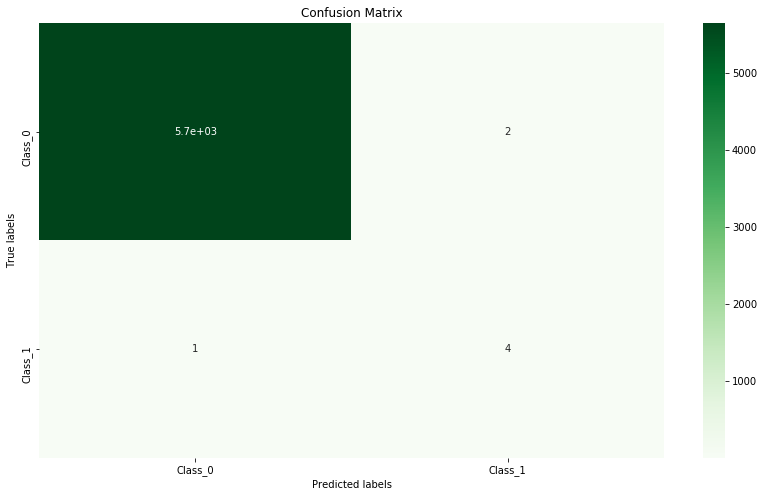

In [13]:
labels = ['Class_0', 'Class_1']
cm = confusion_matrix(Y_test, Y_test_pred_LogReg)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [14]:
print(classification_report(Y_test, Y_test_pred_LogReg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5654
           1       0.67      0.80      0.73         5

    accuracy                           1.00      5659
   macro avg       0.83      0.90      0.86      5659
weighted avg       1.00      1.00      1.00      5659



In [15]:
# Calculate roc_auc score on train set
train_roc_auc_score_LogReg = roc_auc_score(Y_train, Y_train_pred_LogReg)

# Calculate roc_auc score on test set
test_roc_auc_score_LogReg = roc_auc_score(Y_test, Y_test_pred_LogReg)

print("The roc auc score on train data for Logistic Regression is ", train_roc_auc_score_LogReg)
print("The roc auc score on test data for Logistic Regression is ", test_roc_auc_score_LogReg)

The roc auc score on train data for Logistic Regression is  0.9061836400637056
The roc auc score on test data for Logistic Regression is  0.8998231340643792


In [16]:
# Setting the threshould at 0.9
threshold = 0.9
Y_pred_roc = np.where(clf.predict_proba(X_test)[:,1] > threshold, 1, 0)
accuracy_score(Y_test, Y_pred_roc)

0.9994698710019438

[[5652    2]
 [   1    4]]


[Text(0, 0.5, 'Class_0'), Text(0, 1.5, 'Class_1')]

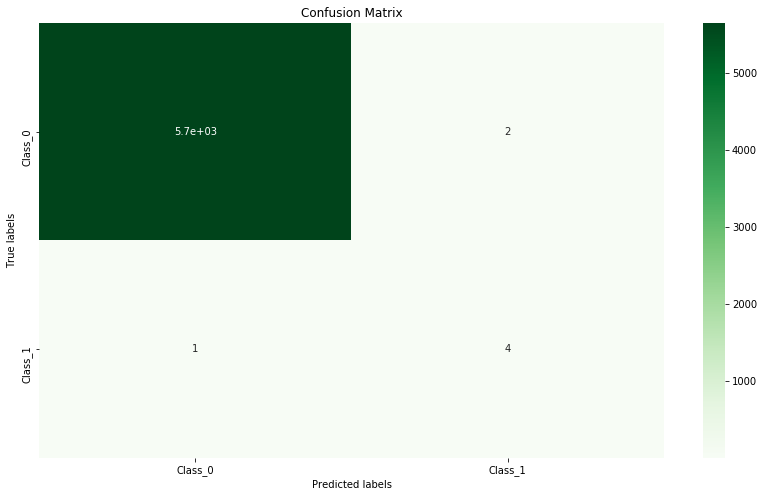

In [17]:
labels = ['Class_0', 'Class_1']
cm = confusion_matrix(Y_test, Y_pred_roc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [18]:
print(classification_report(Y_test, Y_pred_roc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5654
           1       0.67      0.80      0.73         5

    accuracy                           1.00      5659
   macro avg       0.83      0.90      0.86      5659
weighted avg       1.00      1.00      1.00      5659



In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Class'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 28295
Resampled dataset shape 56516


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = state)

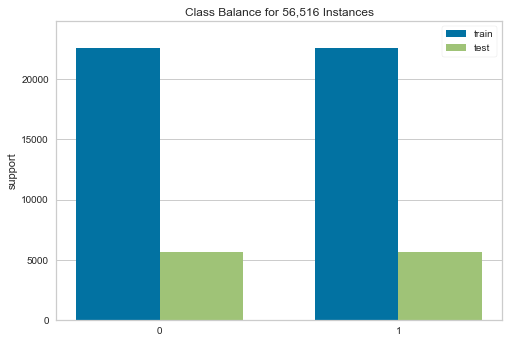

In [27]:
visualizer = ClassBalance(labels = [0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof();

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier() 
grid_values = {'n_estimators': [50, 80, 100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv = 5, verbose = 2)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................max_depth=3, n_estimators=50; total time=   4.4s
[CV] END .......................max_depth=3, n_estimators=50; total time=   5.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   5.6s
[CV] END .......................max_depth=3, n_estimators=50; total time=   5.4s
[CV] END .......................max_depth=3, n_estimators=50; total time=   5.1s
[CV] END .......................max_depth=3, n_estimators=80; total time=   7.6s
[CV] END .......................max_depth=3, n_estimators=80; total time=   7.4s
[CV] END .......................max_depth=3, n_estimators=80; total time=   7.2s
[CV] END .......................max_depth=3, n_estimators=80; total time=   8.1s
[CV] END .......................max_depth=3, n_estimators=80; total time=   6.6s
[CV] END ......................max_depth=3, n_estimators=100; total time=   9.1s
[CV] END ......................max_depth=3, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [32]:
Y_train_pred_RF = classifier.predict(x_train)
Y_test_pred_RF = classifier.predict(x_test)

In [33]:
# Get the accuracy scores
train_accuracy_RF = accuracy_score(Y_train_pred_RF, y_train)
test_accuracy_RF = accuracy_score(Y_test_pred_RF, y_test)

print("The accuracy on train data for Logistic Regression is ", train_accuracy_RF)
print("The accuracy on test data for Logistic Regression is ", test_accuracy_RF)

The accuracy on train data for Logistic Regression is  0.9999336459347076
The accuracy on test data for Logistic Regression is  0.9998230714791224


[[5656    2]
 [   0 5646]]


[Text(0, 0.5, 'Class_0'), Text(0, 1.5, 'Class_1')]

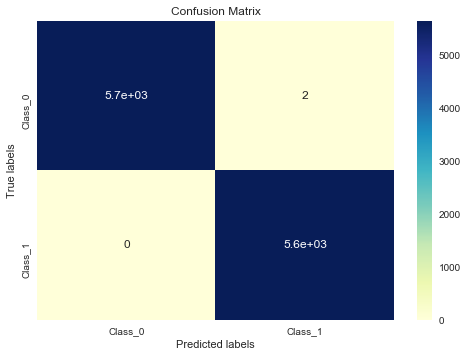

In [34]:
labels = ['Class_0', 'Class_1']
cm = confusion_matrix(y_test, Y_test_pred_RF)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, cmap="YlGnBu"); #annot = True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

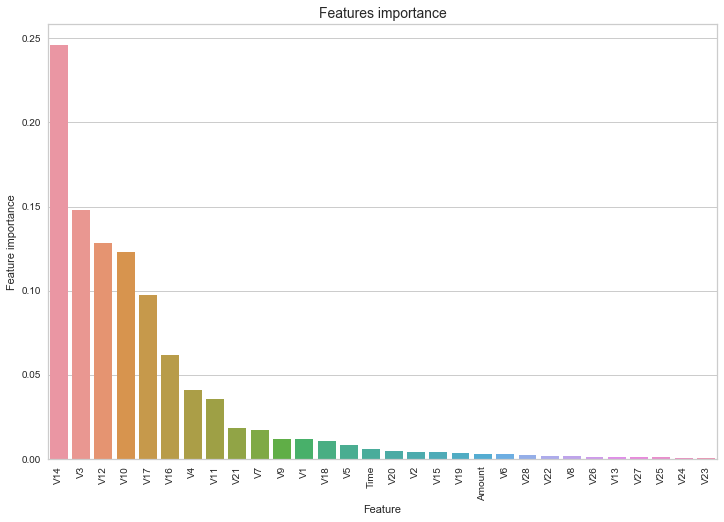

In [35]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature importance': classifier.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by = 'Feature importance', ascending = False)
plt.figure(figsize = (12, 8))
plt.title('Features importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()   

In [36]:
print(classification_report(y_test, Y_test_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5658
           1       1.00      1.00      1.00      5646

    accuracy                           1.00     11304
   macro avg       1.00      1.00      1.00     11304
weighted avg       1.00      1.00      1.00     11304



In [54]:
import shap #SHapley Additive exPlanations

In [53]:
# Random Forest's best estimator is explained by SHAP
model = classifier.best_estimator_
explainer = shap.TreeExplainer(model)

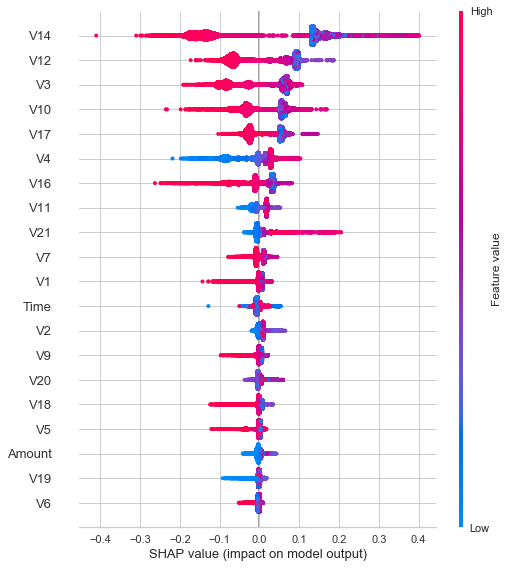

In [58]:
X_shap = x_train
shap_values = shap.TreeExplainer(model).shap_values(X_shap)
shap.summary_plot(shap_values[1], X_shap, plot_type = 'dot')

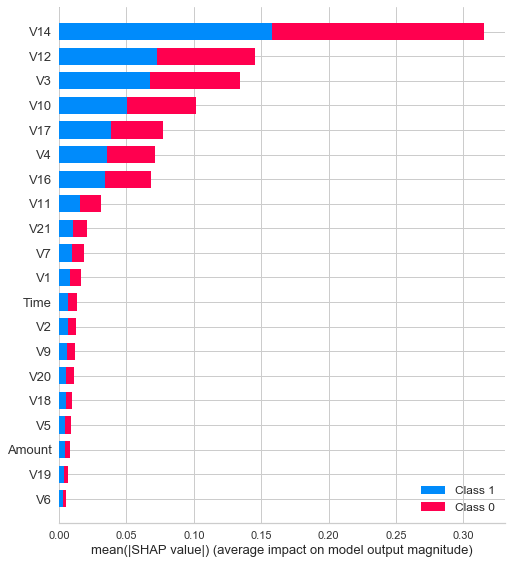

In [60]:
shap.summary_plot(shap_values, X_shap, plot_type = 'bar')

In [61]:
RANDOM_STATE = 2021
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [62]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state = RANDOM_STATE, algorithm = 'SAMME.R',
                         learning_rate = 0.8, n_estimators = NUM_ESTIMATORS)

In [63]:
clf_ada.fit(data[predictors],data['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2021)

In [64]:
Y_train_pred_ADA = clf_ada.predict(x_train)
Y_test_pred_ADA = clf_ada.predict(x_test)

In [65]:
# Get the accuracy scores
train_accuracy_ADA = accuracy_score(Y_train_pred_ADA, y_train)
test_accuracy_ADA = accuracy_score(Y_test_pred_ADA, y_test)

print("The accuracy on train data for Logistic Regression is ", train_accuracy_RF)
print("The accuracy on test data for Logistic Regression is ", test_accuracy_RF)

The accuracy on train data for Logistic Regression is  0.9999336459347076
The accuracy on test data for Logistic Regression is  0.9998230714791224


[[5658    0]
 [ 525 5121]]


[Text(0, 0.5, 'Class_0'), Text(0, 1.5, 'Class_1')]

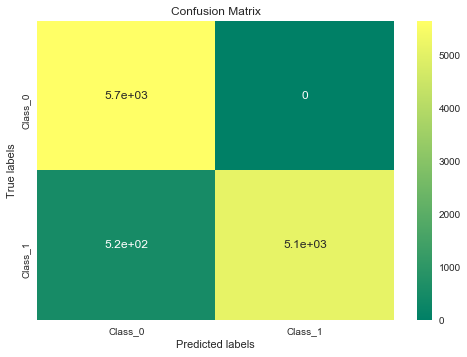

In [66]:
labels = ['Class_0', 'Class_1']
cm = confusion_matrix(y_test, Y_test_pred_ADA)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, cmap = 'summer')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)